In [1]:
import numpy as np
from sympy import symbols, Matrix, simplify
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from scipy.optimize import brentq
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')
import plottingsystem as pts

import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel

In [2]:
benzene_molecule = '''
  C    1.2116068    0.6995215    0.0000000
  C    1.2116068   -0.6995215    0.0000000
  C   -0.0000000   -1.3990430   -0.0000000
  C   -1.2116068   -0.6995215   -0.0000000
  C   -1.2116068    0.6995215   -0.0000000
  C    0.0000000    1.3990430    0.0000000
  H    2.1489398    1.2406910    0.0000000
  H    2.1489398   -1.2406910    0.0000000
  H   -0.0000000   -2.4813820   -0.0000000
  H   -2.1489398   -1.2406910   -0.0000000
  H   -2.1489398    1.2406910   -0.0000000
  H    0.0000000    2.4813820    0.0000000
'''
extra_bounds = [(0,5)]
coordinates = pts.taking_x_and_y_coordinate(pts.taking_carbon_coordinates(benzene_molecule))
print(coordinates)

[[ 1.2116068  0.6995215]
 [ 1.2116068 -0.6995215]
 [-0.        -1.399043 ]
 [-1.2116068 -0.6995215]
 [-1.2116068  0.6995215]
 [ 0.         1.399043 ]]


In [3]:
benzene = huckel(6, 0, -3)
benzene.create_matrix()

H = benzene.huckel_matrix
print(H)
benzene.solve_huckel_matrix()
eigenvalues = benzene.eigenvalues
eigenvectors = benzene.eigenvectors
print(eigenvectors)
beta_operator = np.zeros((6, 6))
beta_operator[0,5] = 1
beta_operator[5,0] = 1
print(beta_operator)

[[ 0. -3.  0.  0.  0. -3.]
 [-3.  0. -3.  0.  0.  0.]
 [ 0. -3.  0. -3.  0.  0.]
 [ 0.  0. -3.  0. -3.  0.]
 [ 0.  0.  0. -3.  0. -3.]
 [-3.  0.  0.  0. -3.  0.]]
[[ 4.08248097e-01 -5.77350406e-01  0.00000000e+00 -5.77350406e-01
   2.18901375e-17  4.08248097e-01]
 [ 4.08248097e-01 -2.88675203e-01 -5.00000119e-01  2.88675203e-01
  -5.00000119e-01 -4.08248097e-01]
 [ 4.08248097e-01  2.88675203e-01 -5.00000119e-01  2.88675203e-01
   5.00000119e-01  4.08248097e-01]
 [ 4.08248097e-01  5.77350406e-01 -4.35210020e-18 -5.77350406e-01
  -2.77793050e-18 -4.08248097e-01]
 [ 4.08248097e-01  2.88675203e-01  5.00000119e-01  2.88675203e-01
  -5.00000119e-01  4.08248097e-01]
 [ 4.08248097e-01 -2.88675203e-01  5.00000119e-01  2.88675203e-01
   5.00000119e-01 -4.08248097e-01]]
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [4]:
potentials = np.linspace(-4, 4, 801)
print(potentials)

[-4.   -3.99 -3.98 -3.97 -3.96 -3.95 -3.94 -3.93 -3.92 -3.91 -3.9  -3.89
 -3.88 -3.87 -3.86 -3.85 -3.84 -3.83 -3.82 -3.81 -3.8  -3.79 -3.78 -3.77
 -3.76 -3.75 -3.74 -3.73 -3.72 -3.71 -3.7  -3.69 -3.68 -3.67 -3.66 -3.65
 -3.64 -3.63 -3.62 -3.61 -3.6  -3.59 -3.58 -3.57 -3.56 -3.55 -3.54 -3.53
 -3.52 -3.51 -3.5  -3.49 -3.48 -3.47 -3.46 -3.45 -3.44 -3.43 -3.42 -3.41
 -3.4  -3.39 -3.38 -3.37 -3.36 -3.35 -3.34 -3.33 -3.32 -3.31 -3.3  -3.29
 -3.28 -3.27 -3.26 -3.25 -3.24 -3.23 -3.22 -3.21 -3.2  -3.19 -3.18 -3.17
 -3.16 -3.15 -3.14 -3.13 -3.12 -3.11 -3.1  -3.09 -3.08 -3.07 -3.06 -3.05
 -3.04 -3.03 -3.02 -3.01 -3.   -2.99 -2.98 -2.97 -2.96 -2.95 -2.94 -2.93
 -2.92 -2.91 -2.9  -2.89 -2.88 -2.87 -2.86 -2.85 -2.84 -2.83 -2.82 -2.81
 -2.8  -2.79 -2.78 -2.77 -2.76 -2.75 -2.74 -2.73 -2.72 -2.71 -2.7  -2.69
 -2.68 -2.67 -2.66 -2.65 -2.64 -2.63 -2.62 -2.61 -2.6  -2.59 -2.58 -2.57
 -2.56 -2.55 -2.54 -2.53 -2.52 -2.51 -2.5  -2.49 -2.48 -2.47 -2.46 -2.45
 -2.44 -2.43 -2.42 -2.41 -2.4  -2.39 -2.38 -2.37 -2

[[ 0. -3.  0.  0.  0. -7.]
 [-3.  0. -3.  0.  0.  0.]
 [ 0. -3.  0. -3.  0.  0.]
 [ 0.  0. -3.  0. -3.  0.]
 [ 0.  0.  0. -3.  0. -3.]
 [-7.  0.  0.  0. -3.  0.]]
[[ 0.62841913  0.26392606 -0.18823504  0.18823504 -0.26392606  0.62841913]
 [ 0.28275199 -0.245428   -0.59984699 -0.59984699 -0.245428   -0.28275199]
 [ 0.15855802 -0.60836507 -0.32365304  0.32365304  0.60836507  0.15855802]
 [ 0.15855802 -0.60836507  0.32365304  0.32365304 -0.60836507 -0.15855802]
 [ 0.28275199 -0.245428    0.59984699 -0.59984699  0.245428    0.28275199]
 [ 0.62841913  0.26392606  0.18823504  0.18823504  0.26392606 -0.62841913]]
[[ 0.   -3.    0.    0.    0.   -6.99]
 [-3.    0.   -3.    0.    0.    0.  ]
 [ 0.   -3.    0.   -3.    0.    0.  ]
 [ 0.    0.   -3.    0.   -3.    0.  ]
 [ 0.    0.    0.   -3.    0.   -3.  ]
 [-6.99  0.    0.    0.   -3.    0.  ]]
[[ 0.62816613  0.26440305 -0.18841004  0.18841004 -0.26440305  0.62816613]
 [ 0.28307885 -0.24511287 -0.59982168 -0.59982168 -0.24511287 -0.28307885]
 

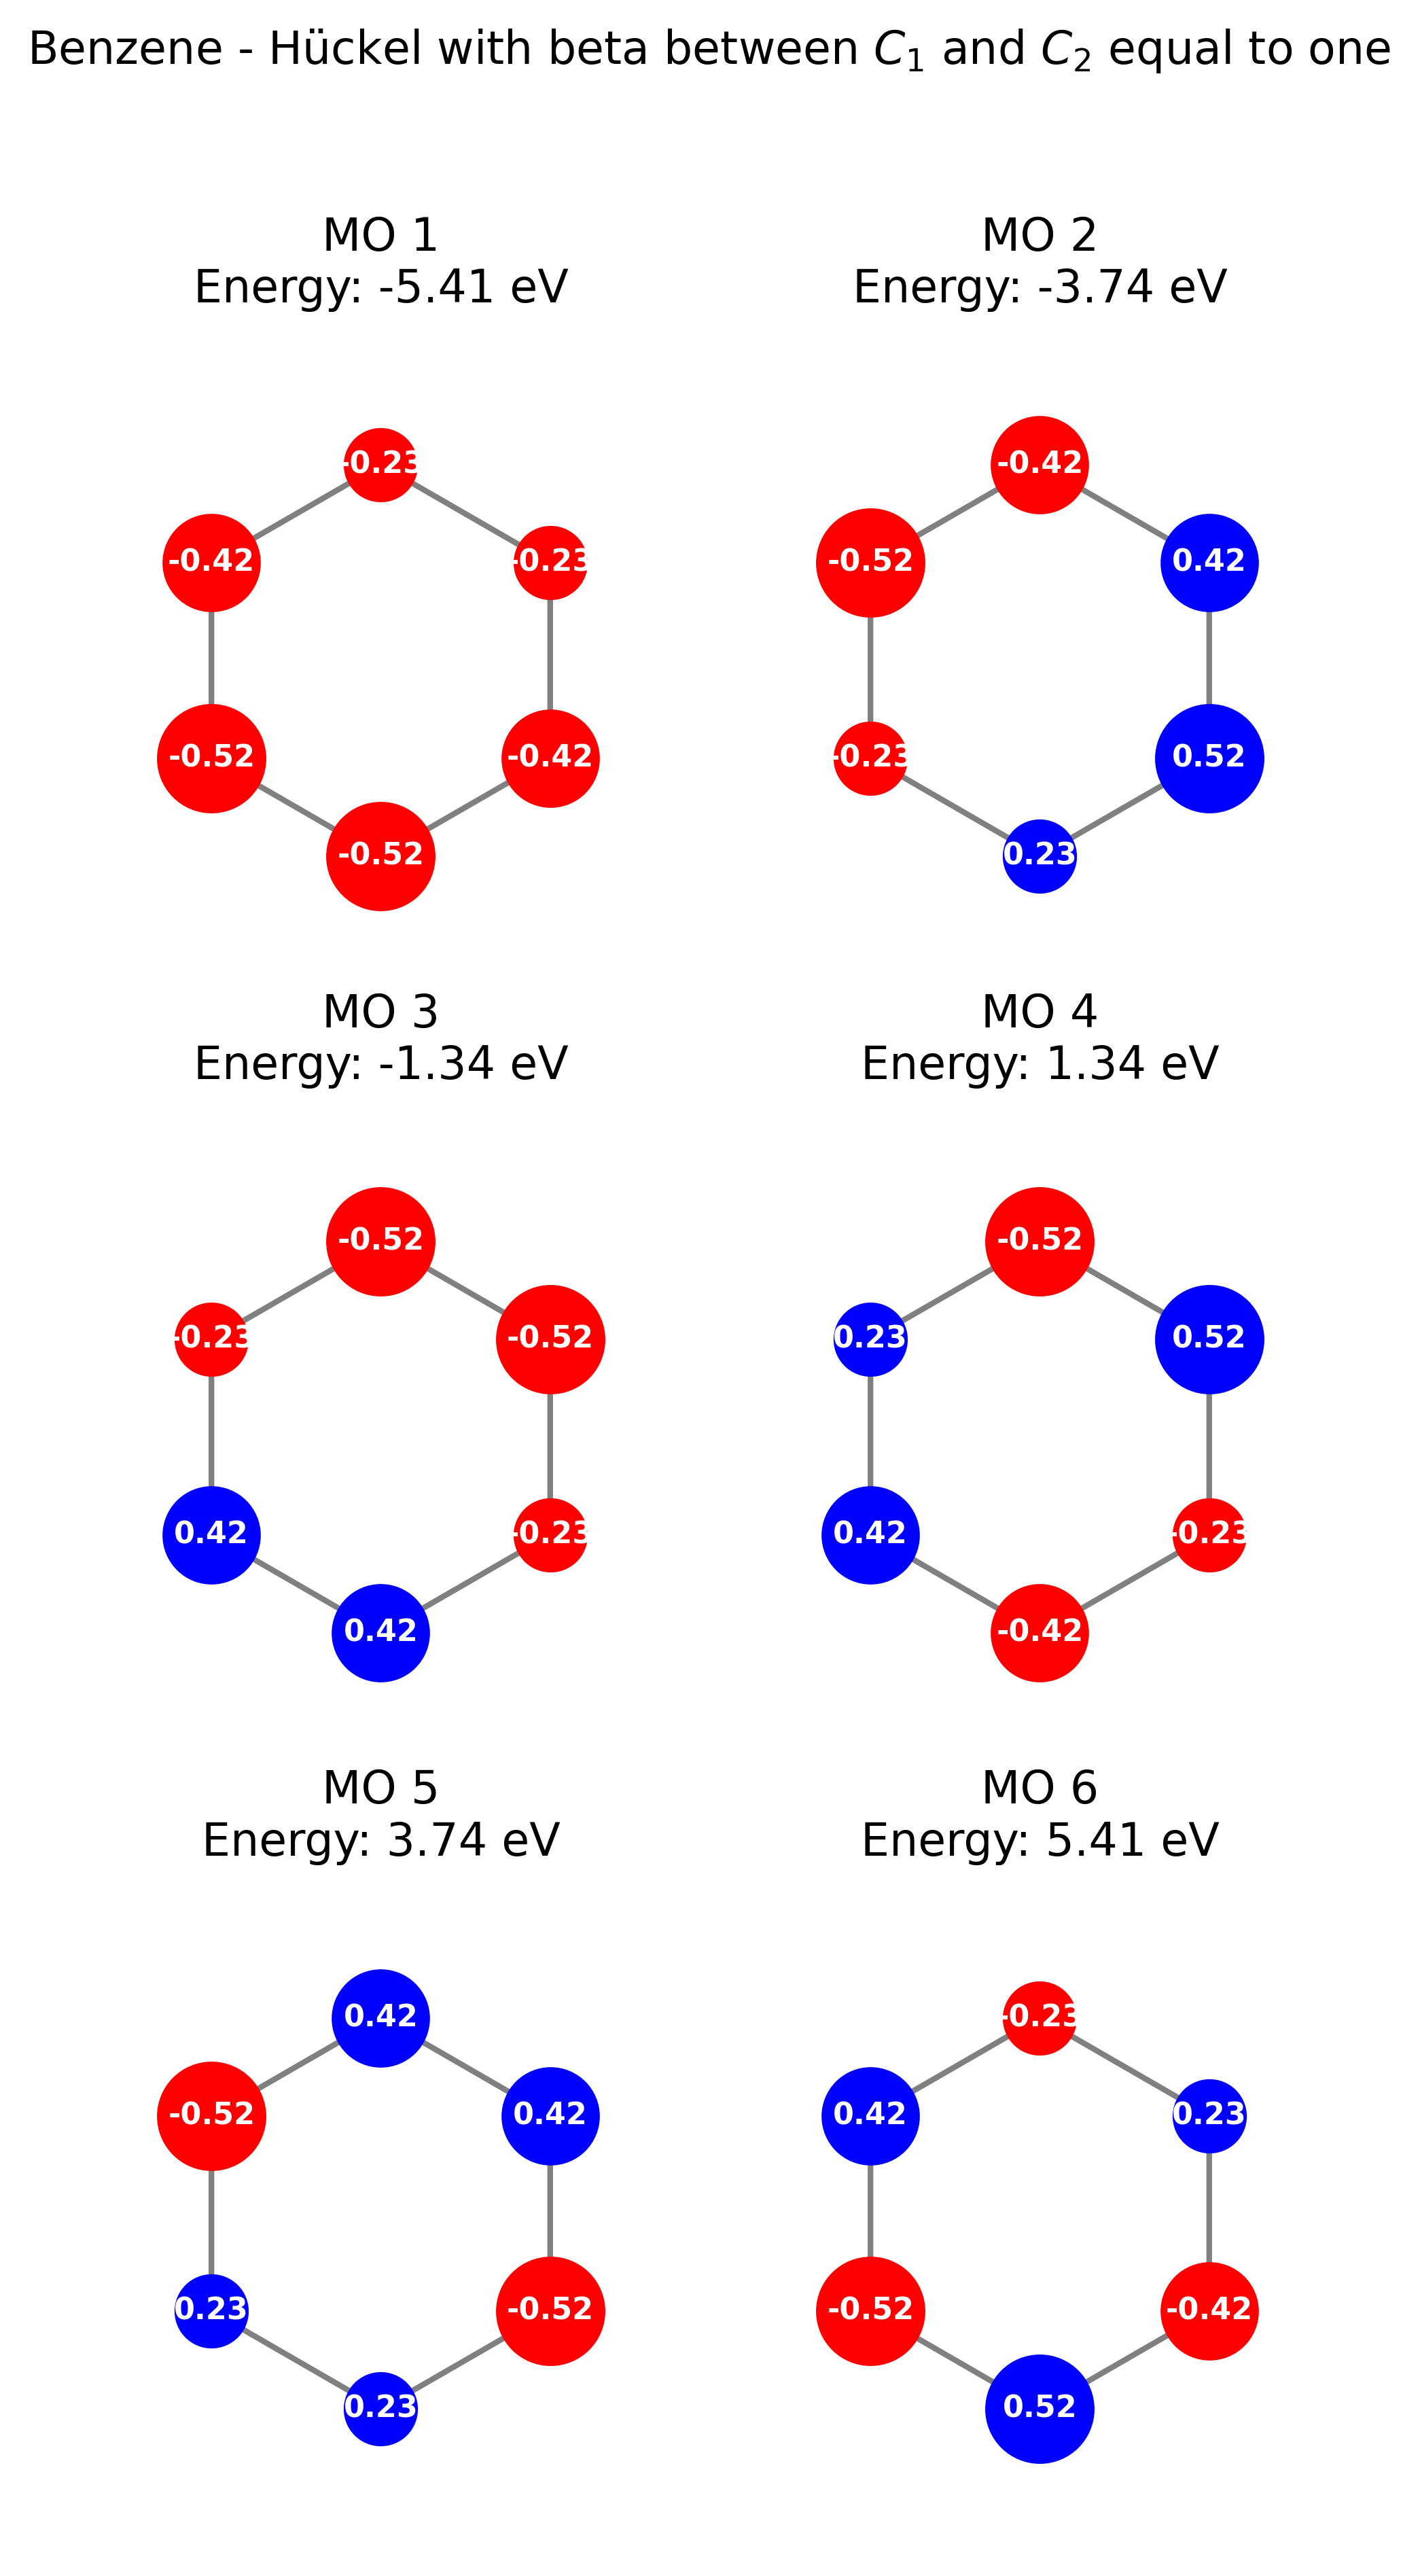

[[ 0.   -3.    0.    0.    0.    0.01]
 [-3.    0.   -3.    0.    0.    0.  ]
 [ 0.   -3.    0.   -3.    0.    0.  ]
 [ 0.    0.   -3.    0.   -3.    0.  ]
 [ 0.    0.    0.   -3.    0.   -3.  ]
 [ 0.01  0.    0.    0.   -3.    0.  ]]
[[-0.23152306 -0.41840311  0.52089914  0.52089914  0.41840311 -0.23152306]
 [-0.41787897 -0.52083296  0.23261598 -0.23261598 -0.52083296  0.41787897]
 [-0.52131959 -0.23167182 -0.41779667 -0.41779667  0.23167182 -0.52131959]
 [-0.52131959  0.23167182 -0.41779667  0.41779667  0.23167182  0.52131959]
 [-0.41787897  0.52083296  0.23261598  0.23261598 -0.52083296 -0.41787897]
 [-0.23152306  0.41840311  0.52089914 -0.52089914  0.41840311  0.23152306]]
[[ 0.   -3.    0.    0.    0.    0.02]
 [-3.    0.   -3.    0.    0.    0.  ]
 [ 0.   -3.    0.   -3.    0.    0.  ]
 [ 0.    0.   -3.    0.   -3.    0.  ]
 [ 0.    0.    0.   -3.    0.   -3.  ]
 [ 0.02  0.    0.    0.   -3.    0.  ]]
[[-0.23112691 -0.41889983  0.52067579  0.52067579  0.41889983 -0.23112691]
 [-0

In [8]:
electron_population = [[],[],[],[],[],[]]
energies = []
for potential in potentials:
    benzene.huckel_matrix = H + potential*beta_operator
    benzene.solve_huckel_matrix()
    print(benzene.huckel_matrix)
    eigenvalues = benzene.eigenvalues
    eigenvectors = benzene.eigenvectors
    print(eigenvectors)
    D_huckel = pts.making_D(eigenvectors, 6)
    for index, density in enumerate(np.diag(D_huckel)):
        electron_population[index].append(density)
    if potential == 3:
        pts.plot_MOs(eigenvalues, eigenvectors, coordinates, extra_bounds, 'Benzene', 'Hückel with beta between $C_1$ and $C_2$ equal to one ', (5,10))


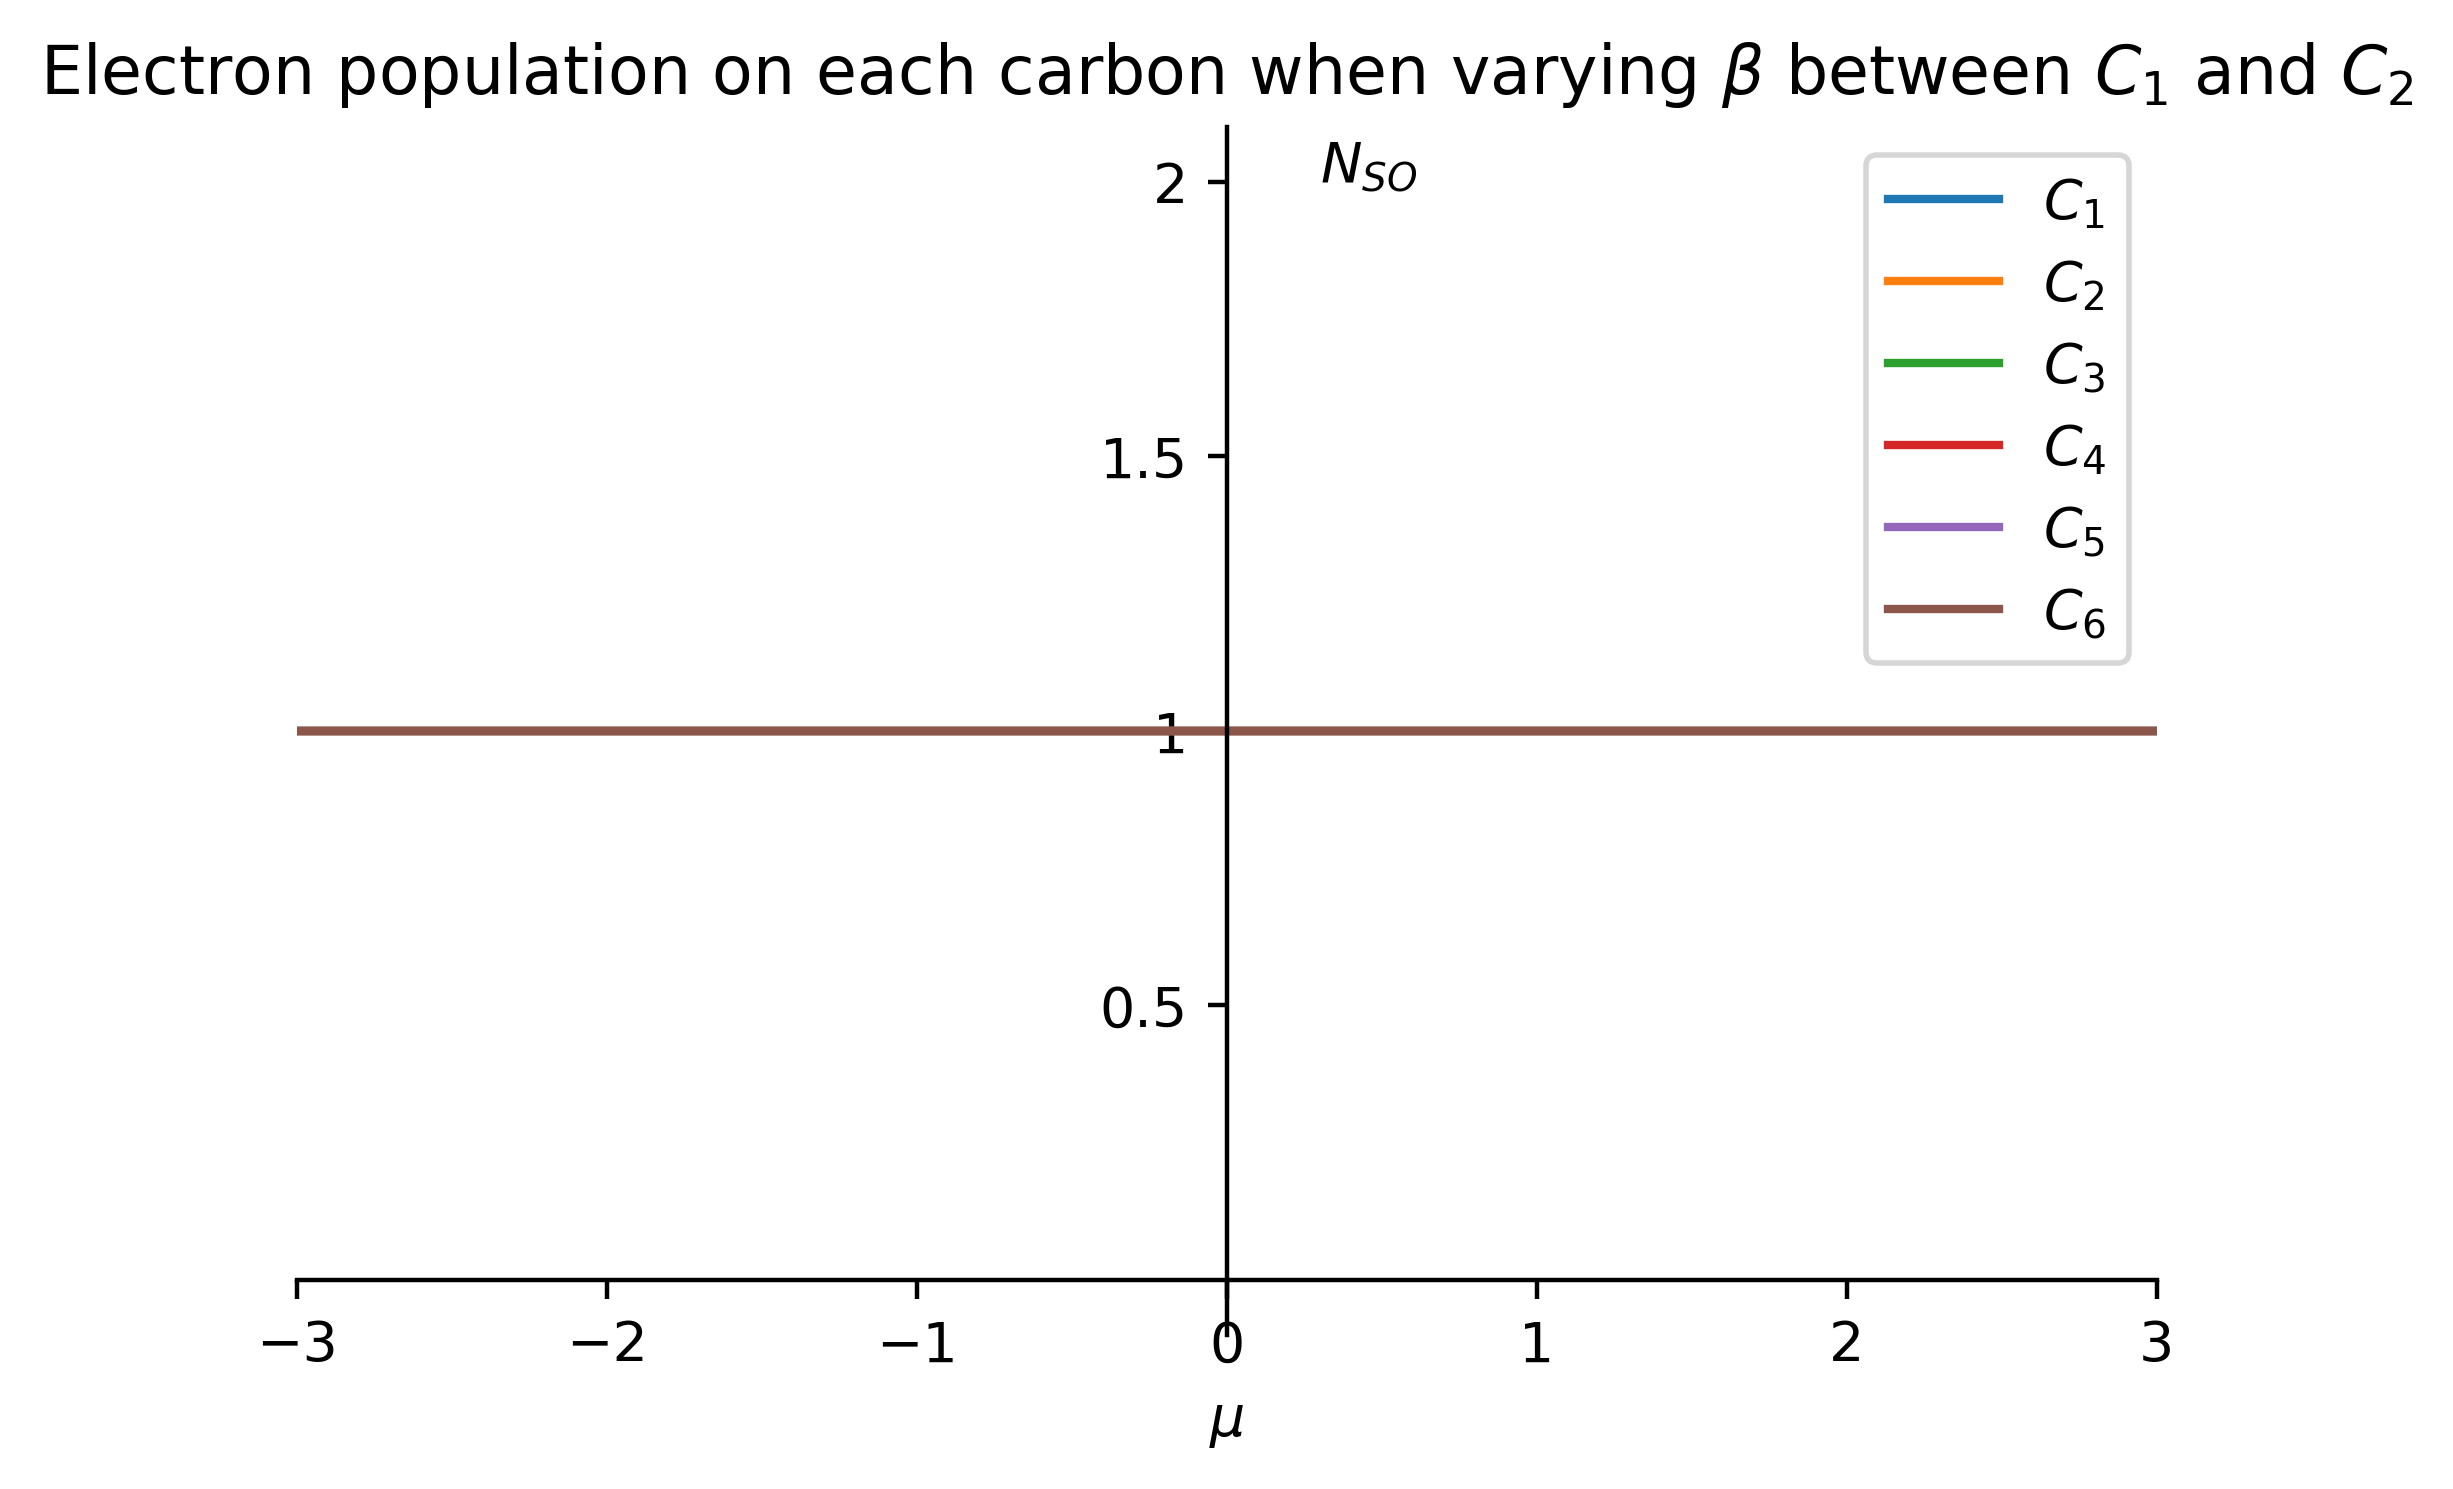

In [12]:
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi= 400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-3, 3)
ax.set_ylim(-0.1, 2.1)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([0.5, 1, 1.5, 2])
ax.set_yticklabels(['0.5', '1', '1.5', '2'])


# Plot de gegevens
x= [5,0,1,2,3,4]
for index, atom in enumerate(x):
    plt.plot(potentials, electron_population[atom], label=f'$C_{index+1}$')

# Benoem de assen en titel 
plt.title('Electron population on each carbon when varying $\\beta$ between $C_1$ and $C_2$')
ax.set_xlabel('$\mu$')
ax.text(0.3, 2, '$N_{SO}$', rotation=0)

# Legenda
plt.legend()

# Toon de plot
plt.show()
